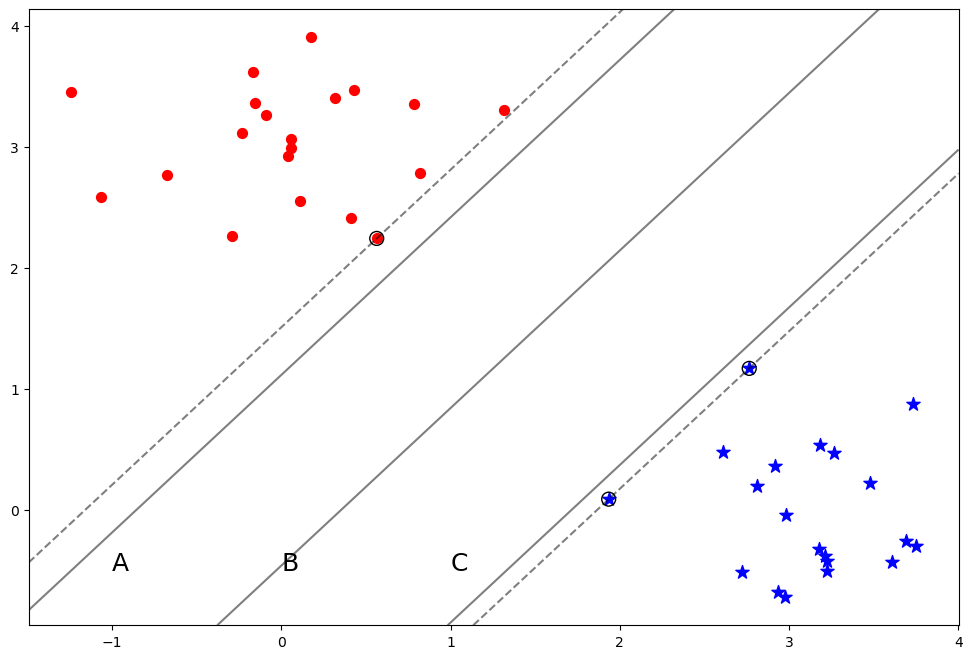

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=[(0, 3), (3, 0)], cluster_std=[0.5, 0.5], random_state=6)
idx_cls_0 = np.where(y == 0)
idx_cls_1 = np.where(y == 1)
# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.figure(figsize = (12, 8))

plt.scatter(X[idx_cls_0, 0], X[idx_cls_0, 1], c='red', marker='o', s=50)
plt.scatter(X[idx_cls_1, 0], X[idx_cls_1, 1], c='blue', marker='*', s=100)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
B = clf.decision_function(xy).reshape(XX.shape)
A = B-0.9
C = B+0.8
# plot decision boundary and margins
ax.contour(XX, YY, B,  colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.contour(XX, YY, A, colors='k', levels=[0], alpha=0.5,
           linestyles=['-'])

ax.contour(XX, YY, C, colors='k', levels=[0], alpha=0.5,
           linestyles=['-'])

# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           marker='o',linewidth=1, facecolors='none', edgecolors='k')

ax.text(0, -0.5, 'B', fontsize=18)
ax.text(-1, -0.5, 'A', fontsize=18)
ax.text(1, -0.5, 'C', fontsize=18)
plt.show()

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()

X = iris["data"]
y = (iris["target"] == 2).astype(np.int8) # 1 if virginica, 0 else

In [11]:
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [13]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [3]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
svm_pl = Pipeline((
    ("scaler", StandardScaler()),
    ("linear_svc", SVC(C=1, kernel="linear", probability = True))
  )
)

svm_pl.fit(X, y)

scores = cross_val_score(svm_pl, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: {:.03f}, Standard Deviation Accuracy: {:.03f}'.format(np.mean(scores), np.std(scores)))

Mean Accuracy: 0.960, Standard Deviation Accuracy: 0.050


In [5]:
# Dự báo nhãn
svm_pl.predict(np.array([[1.2, 3.3, 2.2, 4.5]]))

array([1], dtype=int8)

In [7]:
# Dự báo xác suất, chỉ được khi probability trong SVC() được set True.
svm_pl.predict_proba(np.array([[3.2, 3.0, 4.2, 4.5]]))

array([[3.0000009e-14, 1.0000000e+00]])

In [139]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(
        centers=2, n_samples=500, n_features=2, shuffle=True, random_state=40)

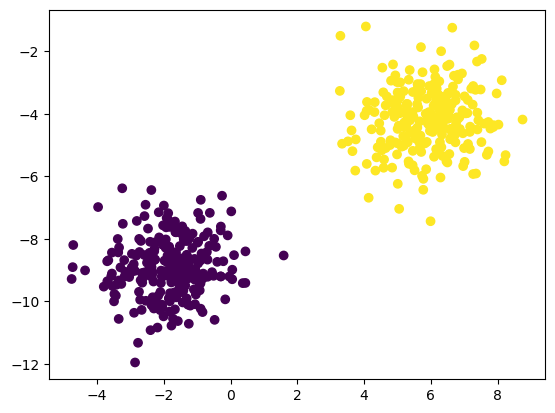

In [141]:
plt.scatter(X[:,0], X[:,1], c=y)

In [143]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X, y)

D:\Users\Asus\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [169]:
y_pred = model.predict(X)
y_pred

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,

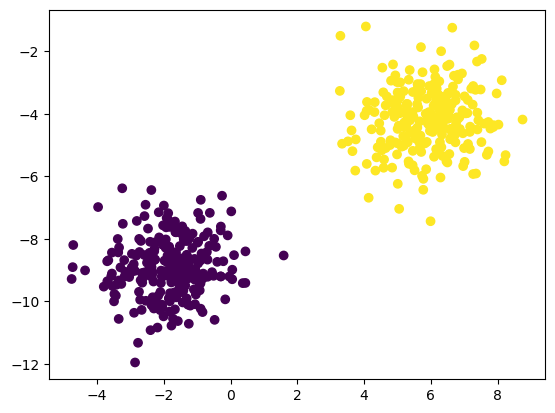

In [171]:
plt.scatter(X[:,0], X[:,1], c=y)

In [173]:
coef = model.intercept_

In [175]:
coef

array([0.06973974])

In [181]:
intercept = model.coef_
intercept

array([[0.58675396, 0.22409426]])

In [179]:
def plot_line(a, b):
    x = np.linspace(-4, 8, 1000)
    y = a * x + b
    plt.plot(x, y)

In [4]:
pip install scikit-learn graphviz pydotplus


     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     -- ---------------------------------- 20.5/278.7 kB 640.0 kB/s eta 0:00:01
     -------------------- ----------------- 153.6/278.7 kB 1.8 MB/s eta 0:00:01
     -------------------------------------- 278.7/278.7 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=8cbb293d070bc389b15a6ac137f3d1866a891b720a102b286e1d4ca3291959b4
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\77\54\7c\c8077b6151c819495492300386cf9b151a954259d1a658c63b
Successfully built pydotplus
